# Linear Regression
##### First use Linear Regression to predict automobile prices. Then apply Lasso and Ridge Regression models on the same data and compare results

In [1]:
import pandas as pd

In [2]:
print(pd.__version__)

1.1.3


### Download the Automobile data set
<b>Download link:</b> https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

<b>Summary:</b> Predict the price of a vehicle given other information about it

<b>Parameters: </b> <br />
1st argument is the location of the file (not necessarily a csv file) <br />
<b>sep</b> specifies the separator, which can also be expressed as a regular expression. Here we trim whitespaces around the commas<br />
<b>engine</b> represents the parsing engine. The values are <i>c</i> and <i>python</i>. The C engine is marginally faster but Python may offer more features 

In [3]:
pwd

'C:\\Users\\Rahul Wangawar\\Documents\\GitHub\\Auto_data'

The data is separated by commas and we are using the Python engine within pandas to read in this file.

Above data contains 20 plus features for over 200 vehicles <br/> features are such as the make of the car, the fuel type, the aspiration, the number of doors, body style, and so on.

In [4]:
auto_data = pd.read_csv("imports-85.data",sep=',', engine='python')
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


#### Fill missing values with NaN

Missing values in this data are represented by the question mark (?). <br/> Numeric packages typically have special functions that allow you to deal with not a number or NaN values. <br/> So it is useful to replace our question marks with NANs which we will do using the NumPy library.

In [5]:
import numpy as np

auto_data = auto_data.replace('?', np.nan)
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


#### Information about numeric fields in our dataframe
The describe function on a pandas data frame is very useful indeed to give you a quick overview of how your data looks.

In [6]:
auto_data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Note that the automobile price is not present, which is our label or our target value for the training data.

In [7]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

#### Information about all fields in our dataframe

In [8]:
auto_data.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201,201,205.000000,203,203,205.000000,205.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,...,NaN,8,38,36,NaN,59,23,NaN,NaN,186
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.4,NaN,68,5500,NaN,NaN,16500
freq,NaN,11,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,2
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


The price field is now included. But it has many NaN values. <br/>If we examine the price column alone we will find that this is of type object. <br/> An object cannot be summarized with numerical statistics. <br/> We need to convert this column to be of type float. 

### Data Cleaning
Also called data cleansing. Involves identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

#### What data type is price?

In [9]:
auto_data['price'].describe()

count       201
unique      186
top       16500
freq          2
Name: price, dtype: object

#### Convert the values in the price column to numeric values
If conversion throws an error set to NaN (by setting errors='coerce')

Pandas offers a very easy way to do this using the <b>pd.to_numeric </b> library function. <br/> This converts the price column to numeric values. We have used <u> errors='coerce' </u> for ignoring the errors. <br/> That means we want to ignore errors and force the conversion.

In [10]:
auto_data['price'] = pd.to_numeric(auto_data['price'], errors='coerce') 

In [11]:
auto_data['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

#### Dropping a column which we seem unnecessary

As we examine the input feature set we can find that there are certain columns whose values make no sense in determining the price of a particular vehicle. <br/> One such column is the <b>normalized losses </b>. This has to do with insurance payment, the loss on insurance payment for a particular kind of vehicle. <br/> That's not a predictor of automobile price. So we go ahead and drop this column.

In [12]:
auto_data = auto_data.drop('normalized-losses', axis=1)
auto_data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450.0


In [13]:
auto_data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220,13207.129353
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


We can see that the price column is now numeric but there are other columns that might need to be processed. <br/> The <b>horsepower</b> column is also in non-numeric form as well. It is of type object.

#### Horsepower is also non-numeric...

In [14]:
auto_data['horsepower'].describe()

count     203
unique     59
top        68
freq       19
Name: horsepower, dtype: object

#### ...so this is also converted to a numeric value

In [15]:
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce') 

In [16]:
auto_data['horsepower'].describe()

count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

number of cylinders variable is also of type object.

In [17]:
auto_data['num-of-cylinders'].describe()

count      205
unique       7
top       four
freq       159
Name: num-of-cylinders, dtype: object

#### Since there are only 7 unique values, we can explicitly set the corresponding numeric values

In [18]:
auto_data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,104.256158,25.219512,30.751220,13207.129353
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,39.714369,6.542142,6.886443,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,48.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,70.000000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,95.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,116.000000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,288.000000,49.000000,54.000000,45400.000000


Let us perform a mapping using the Python dictionary from categorical values to numeric values which make sense.<br/>  Please make a note that this step is not encoding the categorical value. Instead we are assigning numerical values which make more sense and the number of cylinders that our car has will drive the price of our automobile.

In [18]:
cylinders_dict = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
auto_data['num-of-cylinders'].replace(cylinders_dict, inplace=True)

In [19]:
auto_data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102.0,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115.0,5500,18,22,17450.0


In [20]:
auto_data['num-of-cylinders'].head()

0    4
1    4
2    6
3    4
4    5
Name: num-of-cylinders, dtype: int64

#### All other non-numeric fields can be made into usable features by applying one-hot-encoding

All of the below variable will affect the automobile price but they have specific discrete values. <br/> Let us use the  <b>pd.get_dummies</b> method to convert all of these categorical values into one hot representation.

In [21]:
auto_data = pd.get_dummies(auto_data, 
                           columns=['make', 
                                    'fuel-type', 
                                    'aspiration', 
                                    'num-of-doors', 
                                    'body-style', 
                                    'drive-wheels', 
                                    'engine-location', 
                                    'engine-type', 
                                    'fuel-system'])
auto_data.head()

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0


In [22]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 69 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   wheel-base              205 non-null    float64
 2   length                  205 non-null    float64
 3   width                   205 non-null    float64
 4   height                  205 non-null    float64
 5   curb-weight             205 non-null    int64  
 6   num-of-cylinders        205 non-null    int64  
 7   engine-size             205 non-null    int64  
 8   bore                    201 non-null    object 
 9   stroke                  201 non-null    object 
 10  compression-ratio       205 non-null    float64
 11  horsepower              203 non-null    float64
 12  peak-rpm                203 non-null    object 
 13  city-mpg                205 non-null    int64  
 14  highway-mpg             205 non-null    in

#### Drop rows containing missing values

Pandas offers a very helpful function dropna(), which allows us to drop all obesrvations which have atlest one varaiable with NaN  (missing values).

In [22]:
auto_data = auto_data.dropna()
auto_data

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,...,1,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.4,...,0,0,0,0,0,1,0,0,0,0


#### Verify that there are no null values in the data set

In [23]:
auto_data[auto_data.isnull().any(axis=1)]

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi


In [24]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 204
Data columns (total 69 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               195 non-null    int64  
 1   wheel-base              195 non-null    float64
 2   length                  195 non-null    float64
 3   width                   195 non-null    float64
 4   height                  195 non-null    float64
 5   curb-weight             195 non-null    int64  
 6   num-of-cylinders        195 non-null    int64  
 7   engine-size             195 non-null    int64  
 8   bore                    195 non-null    object 
 9   stroke                  195 non-null    object 
 10  compression-ratio       195 non-null    float64
 11  horsepower              195 non-null    float64
 12  peak-rpm                195 non-null    object 
 13  city-mpg                195 non-null    int64  
 14  highway-mpg             195 non-null    in

### Data Cleaning is now complete
We can now use our data to build our models

#### Create training and test data using train_test_split

Scikit-learn offers a very handy function for the train test split that offers a very easy way to split our data set into training instances and test instances.

In [25]:
from sklearn.model_selection import train_test_split

X = auto_data.drop('price', axis=1)

# Taking the labels (price)
Y = auto_data['price']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Above code says, X contains the features which form the input to our model includes all of the columns in our data frame except the price column.<br/>
The price column is our Y (Target) variable.<br/>
Using the train test split function from scikit-learn to split our input data set into training and test data. <br/> Test size is equal to 0.2 gives us the proportion of test data. 20% of the input data is reserved for testing.

## Create a LinearRegression model with our training data

Linear regression involves fitting a line using a slope as well as an intercept.

An estimator is a high level API that scikit-learn offers which implements the fit method. <br/> Any object in scikit-learn which learns from data which can be trained is an estimator. <br/> Here Linear Regression is our estimator object and we call the fit method passing in the X data as well as the Y variables to start the training process for this estimator. 

In [26]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

In [28]:
#linear_model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
#linear_model.fit(X_train, Y_train)

# The data is not centered around zero. Normalize is set to false indicating that 
#we do not want to normalize our data. Normalization is a process similar to standardization. 
#It involves subtracting the mean and dividing by the L two norm, not the standard deviation.


#### Check R-square on training data


We can get the R-square of this regression model which measures how good our regression line fit is by calling the score method on the linear model.

In [29]:
linear_model.score(X_train, Y_train)

0.967922737092433

Here R-square value is 96.747, which is a pretty high value. <br/>This is the R square of the training data. <br/> Note that the regression model captures 96% of the variance in our training data set. 

#### View coefficients for each feature

We can view the coefficients on the regression by calling linear model.coef_. <br/> This will show us the weights for all the features in our data set. 

In [27]:
linear_model.coef_

array([-5.80061464e+02,  3.06874682e+02, -1.06499194e+02,  1.52236727e+02,
       -5.05771408e+02,  5.30902624e+00, -4.15988710e+03,  2.82885047e+02,
       -1.75044342e+04, -4.49860407e+03, -1.59555122e+03, -4.82296063e+01,
        2.15673623e+00, -6.79852969e+01,  1.73362582e+02, -3.74284422e+03,
        3.71721668e+03,  6.86565908e+03, -4.12474818e+03, -4.48093478e+03,
       -2.94555422e+02, -4.74283895e+03,  3.47319261e+03, -4.08732786e+02,
        3.02841192e+03,  2.30284405e+03, -4.71448781e+03, -6.67651176e+02,
       -8.40276958e+03, -5.25933085e+03,  1.04713265e+04,  1.27329258e-11,
        8.36042927e+03, -4.81543507e+02, -2.06062392e+03,  6.21153583e+01,
        1.09986569e+03,  6.06615966e+03, -6.06615966e+03, -1.38232301e+03,
        1.38232301e+03,  3.37569880e+03,  3.28229109e+03,  2.99875643e+03,
       -1.00643481e+03, -1.20820627e+03, -3.92414032e+02, -3.91701310e+02,
       -4.99487338e+02, -6.59140532e+02,  1.15862787e+03, -2.46748485e+03,
        2.46748485e+03, -

#### A better view of the coefficients
List of features and their coefficients, ordered by coefficient value

Checking the weights alone gives us no information. <br/>Checking the weights associated with a particular feature are really useful. <br/>
This association will allow us to see how much weight that is given to a particular feature in the final regression model.<br/>
We can see what factors really drive the price of automobiles. 

In [29]:
predictors = X_train.columns
coef = pd.Series(linear_model.coef_,predictors).sort_values(ascending=False)

print(coef)

make_porsche        10471.326516
make_saab            8360.429269
make_bmw             6865.659076
fuel-type_diesel     6066.159660
fuel-system_idi      6066.159660
                        ...     
make_isuzu          -4742.838945
make_plymouth       -5259.330848
fuel-type_gas       -6066.159660
make_peugot         -8402.769583
bore               -17504.434184
Length: 68, dtype: float64


From the above output, we can see 
+ Some features are associated with negative coefficients which means these features are negatively correlated to the price. Cars with these features are cheaper. <br/>
+ The coefficient of certain features are very small, very close to zero, which means these features have very little effect on the vehicle price.
+ The highest coefficients are associated with those features which drive up the price of a vehicle.

#### Make predictions on test data

Let us now use this model for prediction. <br/> Estimators have the predict function which you can call in order to predict with an input data set. <br/>
X_test data set is test data. The predicted prices of the automobiles will be stored in Y_predict.

In [30]:
y_predict = linear_model.predict(x_test)

#### Compare predicted and actual values of Price

let us plot it out in a graph using matplotlib to see how closely our predicted labels follow the actual labels

Populating the interactive namespace from numpy and matplotlib


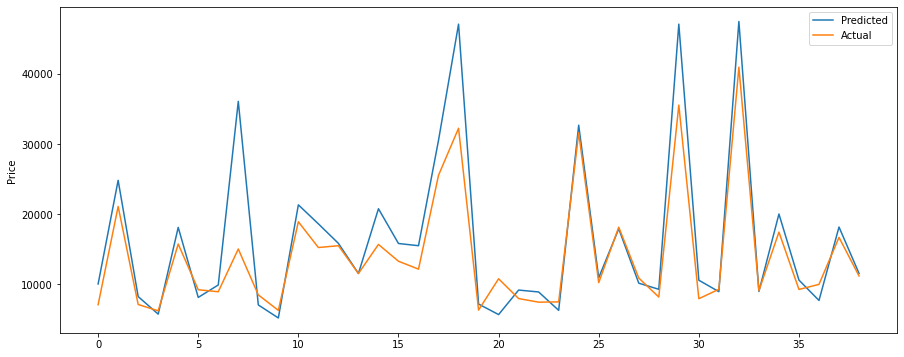

In [31]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

In the above graph, the predicted values are depicted by the blue lines and <br/> the actual values by the orange line. <br/> We can see at the various points of prediction that these are reasonably close.

#### R-square score
For our model, how well do the features describe the price?
<br/>
Let us see how well our regression model works on the test data set is given by the R square of the test data set.

In [32]:
r_square = linear_model.score(x_test, y_test)
r_square

0.6322583416117916

R-square is 63.83% on test data. <br/>This is not as good as what we got with the training data but that was to be expected. 

#### Calculate Mean Square Error

+ The mean square error is the objective function of the ordinary least squares method of regression.

In [33]:
from sklearn.metrics import mean_squared_error

linear_model_mse = mean_squared_error(y_predict, y_test)
linear_model_mse

26099937.604334466

+ The mean square error is calculated on the predicted labels and the actual labels and the mean square error for our model is of the order of 26 million.

#### Root of Mean Square Error (RMSE)

+ This is another interesting metric for any regression model. <br/> RMSE is the square root of the mean square error that we just calculated above. 
+ The root mean square error describes on average how much our predicted label will differ from the actual label.

In [34]:
import math

math.sqrt(linear_model_mse)

5108.809803108202

+ The RMSE is around 5,108 for our model which means on average the price predicted by our model is around 5,100 dollars away from the actual price. 
+ This can be in the positive or negative direction.

# Lasso and Ridge Regression 

Preventing overfitting in regression requires the use of regularized regression models. <br/> Lasso regression penalizes large regression coefficients. Ridge regression also works the same way with a slightly different objective function. <br/>Elastic net regression simply combines Lasso and Ridge. <br/>
Regularization reduces the variance error but increases the bias error.

### Lasso Regression
Cost Function: RSS + <b>&alpha;</b>*(sum of absolute values of coefficients)

RSS = Residual Sum of Squares

Larger values of <b>&alpha;</b> should result in smaller coefficients as the cost function needs to be minimized

In [37]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.5, normalize=True)
lasso_model.fit(X_train, Y_train)

Lasso(alpha=0.5, normalize=True)

This additional term is multiplied by <b>&alpha;</b> which is a hyperparameter than we specify.

#### Check R-square on training data

In [38]:
lasso_model.score(X_train, Y_train)

0.9651081272527551

#### Coefficients when using Lasso

In [39]:
coef = pd.Series(lasso_model.coef_,predictors).sort_values()
print(coef)

bore                    -9092.176284
make_peugot             -6467.778380
make_jaguar             -6193.545297
engine-location_front   -4537.583890
engine-type_ohcv        -4223.273694
                            ...     
engine-type_l            4268.717784
make_mercedes-benz       4728.694733
make_bmw                 6586.645811
make_saab                6762.816668
make_porsche             7787.668286
Length: 68, dtype: float64


#### Make predictions on test data

In [40]:
y_predict = lasso_model.predict(x_test)

#### Compare predicted and actual values of Price

Populating the interactive namespace from numpy and matplotlib


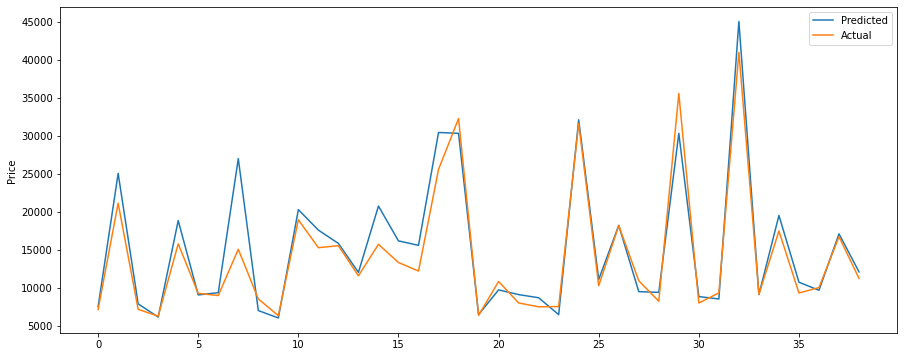

In [41]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

#### Check R-square value on test data

In [42]:
r_square = lasso_model.score(x_test, y_test)
r_square

0.887194953444848

The R square on the test data for our Lasso regression model is 88.72%. It's much better than the linear model which was around 63.82%. 

#### Is the root mean square error any better?

So the Lasso regression model is better for prediction by calculating the root mean square error as well.

In [43]:
lasso_model_mse = mean_squared_error(y_predict, y_test)
math.sqrt(lasso_model_mse)

2829.518800848218

Compared with 5108 for the linear model this is around 2829. <br/>
Change the &alpha; value (hyperparameter) and see how our model changes. 

### Ridge Regression
Cost Function: RSS + <b>&alpha;</b>*(sum of squares of coefficients)

RSS = Residual Sum of Squares

Larger values of α should result in smaller coefficients as the cost function needs to be minimized

Ridge Regression penalizes large coefficients even more than Lasso as coefficients are squared in cost function

In [44]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.05, normalize=True)
ridge_model.fit(X_train, Y_train)

Ridge(alpha=0.05, normalize=True)

#### Check R-square on training  data

In [45]:
ridge_model.score(X_train, Y_train)

0.9538248035642567

#### Coefficients when using Ridge

In [46]:
coef = pd.Series(ridge_model.coef_,predictors).sort_values()
print(coef)

make_jaguar              -4721.702089
engine-location_front    -3375.974878
make_peugot              -3042.959224
make_isuzu               -2186.005015
engine-type_ohcv         -2070.071555
                             ...     
body-style_convertible    3298.480263
engine-location_rear      3375.974878
make_porsche              5452.966732
make_mercedes-benz        6665.125605
make_bmw                  7055.960924
Length: 68, dtype: float64


#### Make predictions on test data

In [47]:
y_predict = ridge_model.predict(x_test)

#### Compare predicted and actual values of Price

Populating the interactive namespace from numpy and matplotlib


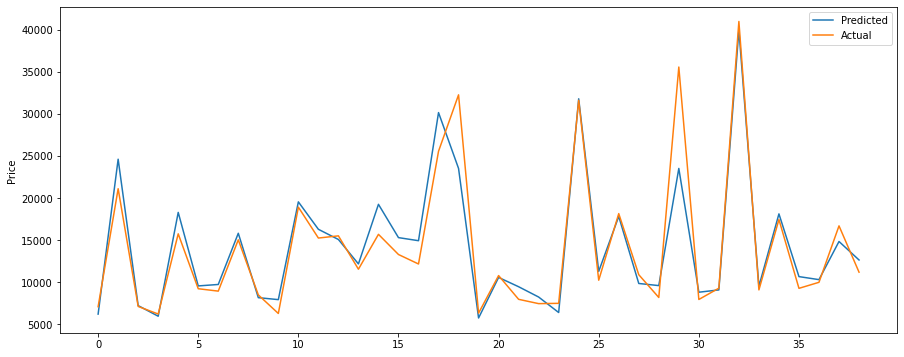

In [48]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

#### Get R-square value for test data

In [49]:
r_square = ridge_model.score(x_test, y_test)
r_square

0.8875663034165489

In [50]:
ridge_model_mse = mean_squared_error(y_predict, y_test)
math.sqrt(ridge_model_mse)

2824.857626833409

### Apply SVR on this data set

+ The support vector regression or the SVM regression problem. 
+ Support vector machines are typically used for classification problems, spam or ham, fraudulent or not. 
+ Support vector regression uses the same underlying principles as support vector machines for classification except that the objective function for the model is different and that makes all the difference in the world. 
<br/>
+ Here C is a penalty factor or C hyperparameter that we can tweak in both SVM classification as well as regression

In [51]:
from sklearn.svm import SVR

regression_model = SVR(kernel='linear', C=1.0)
regression_model.fit(X_train, Y_train)

SVR(kernel='linear')

#### R-square on training data

In [52]:
regression_model.score(X_train, Y_train)

0.7601810603162245

In [53]:
coef = pd.Series(regression_model.coef_[0], predictors).sort_values()
print(coef)

body-style_hatchback   -15.913994
drive-wheels_fwd       -10.684989
make_mitsubishi         -9.000000
fuel-system_spdi        -8.000000
stroke                  -7.631257
                          ...    
compression-ratio       32.209153
length                  33.213934
wheel-base              40.150685
horsepower              46.862621
engine-size             52.193945
Length: 68, dtype: float64


In [54]:
y_predict = regression_model.predict(x_test)

Populating the interactive namespace from numpy and matplotlib


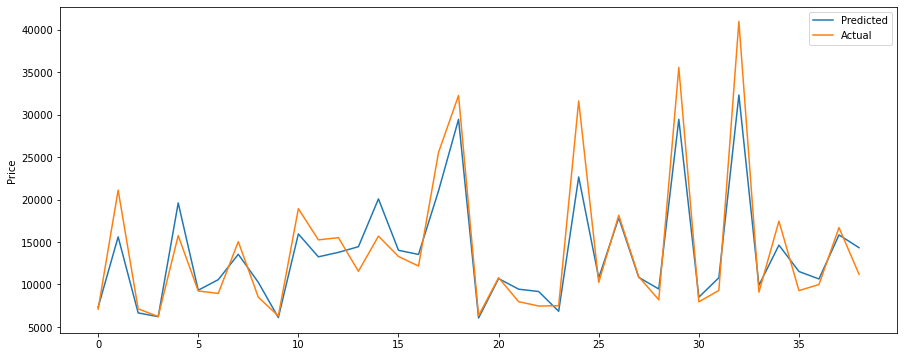

In [55]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

#### R-square on test data

In [56]:
r_square = regression_model.score(x_test, y_test)
r_square

0.8719400287912357

In [57]:
regression_model_mse = mean_squared_error(y_predict, y_test)
math.sqrt(regression_model_mse)

3014.775792136513